# Analysis of the ULX's NGC7793 P9

### Alba Rodríguez Castellano, UCM

#### Supervised by: Felix Fuerst, ESAC

In [1]:
import pandas as pd
import astropy as atp
from astropy import units as u
import numpy as np
from astropy.table import QTable
from astropy.time import TimeMJD, Time, TimeString
import pylab
import matplotlib as mpl
mpl.rcParams['font.size'] = 17.0
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 2
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

### Part 1: Importing data

To attach the data I'm going to use pandas function 'read_csv' indicating the format of the comments and separators of the .dat file:

In [2]:
df= pd.read_csv('curve_plain.dat', sep='\s+',comment='!', engine='python',header=None) 
upperlimits=pd.read_csv('upper.dat', sep='\s+',comment='!', engine='python',header=None) 

I divided the dataframe into 2: one with the normal data and other with the upperlimits

Let's see if everything is OK, showing up the first 5 rows

In [3]:
df.head(5)

,0,1,2,3,4,5,6
0,1.753207e+06,31529.095,-31529.095,0.003123,0.001368,-0.001078,::ObsID=00031791005
1,3.166740e+06,23626.948,-23626.948,0.001272,0.000870,-0.000619,::ObsID=00031791008
2,3.246647e+07,3119.464,-3119.464,0.006774,0.002274,-0.001873,::ObsID=00031791018
3,3.270564e+07,17630.496,-17630.496,0.010752,0.003401,-0.002843,::ObsID=00031791019
4,5.257380e+07,166.735,-166.735,0.018022,0.009752,-0.007203,::ObsID=00046280001


OK, fine. So, next is to name the columns (time, time error (+ve), time error (-ve), source count-rate...) and drop the 6 column.

In [4]:
headers = ["time", "time error (+ve)", "time error (-ve)", "source count-rate","source error(+)", "source error (-)","ObsID"]
df.columns = headers
upperlimits.columns=headers

#del(df['ObsID']) With this line we can drop "ObsID" column but I'm not going to do this for the moment

In [5]:
df.head(5)


,time,time error (+ve),time error (-ve),source count-rate,source error(+),source error (-),ObsID
0,1.753207e+06,31529.095,-31529.095,0.003123,0.001368,-0.001078,::ObsID=00031791005
1,3.166740e+06,23626.948,-23626.948,0.001272,0.000870,-0.000619,::ObsID=00031791008
2,3.246647e+07,3119.464,-3119.464,0.006774,0.002274,-0.001873,::ObsID=00031791018
3,3.270564e+07,17630.496,-17630.496,0.010752,0.003401,-0.002843,::ObsID=00031791019
4,5.257380e+07,166.735,-166.735,0.018022,0.009752,-0.007203,::ObsID=00046280001


### Part 2: Changing x-axis scale from UTC(s) to MJD(d)

Immediately, we are going to change the x-axis format to MJD, for that we have to keep in mind that T0 of the outburst is Swift MET=303612489.8 s, = 2010 Aug 16 at 00:48:03.716 UT. So the times shown in the graphic are the seconds that have passed since this moment. First, we are going to convert T0 to MJD, to do this we are going to use astropy package 'astropy.time' that help us to do this conversions more easily. For more information go to: https://docs.astropy.org/en/stable/time/

In [6]:
t=Time('2010:227:0:48:03.716',format='yday') #definimos T0
t.mjd #lo pasamos a MJD


55423.033376342595

Next, we are going to create an astropy Table from our dataframe with the package 'astropy.table' using Qtable.from_pandas() function. We do this because we want to convert our 'Time' data columns units from seconds to days and then to MJD. After converting df to table, we use the package 'astropy.units' to make these unit changes (https://docs.astropy.org/en/stable/units/):

In [7]:
df=QTable.from_pandas(df)
upperlimits=QTable.from_pandas(upperlimits)
df['time'].unit = u.s#we define our column units
#df['source count-rate'].unit = u.keV/u.s #we define our column units
#df['source error(+)'].unit = u.keV/u.s #we define our column units
upperlimits['time'].unit=u.s #we define our column units
#upperlimits['source count-rate'].unit=u.keV/u.s #we define our column units
#upperlimits['source error(+)'].unit=u.keV/u.s #we define our column units

Now we are able to change to days:

In [8]:
df['time']=df['time'].to(u.d)/u.d #we make it dimensionless
upperlimits['time']=upperlimits['time'].to(u.d)/u.d #we make it dimensionless


Therefore, to obtain finally what we want, we sum up the T0 in MJD with the columns of our dataframes that now are in days.

In [9]:
df['time']=df['time']+55423.033376342595
upperlimits['time']=upperlimits['time']+55423.033376342595


### Part 3: XMM_Newton observations points

On this step, we are going to define the points where XMM-Newton has observed our source on a low-state and high-state:

In [15]:
xmm= pd.read_csv('xmm.csv')
xmm.head(5)

,OBSERVATION.OBSERVATION_ID,OBSERVATION.TARGET,OBSERVATION.RA_NOM,OBSERVATION.DEC_NOM,OBSERVATION.REVOLUTION,OBSERVATION.START_UTC,OBSERVATION.END_UTC,OBSERVATION.DURATION,TARGET_TYPE.DESCRIPTION,PROPOSAL.PI_SURNAME,PROPOSAL.TYPE,OBSERVATION.PROPRIETARY_END_DATE,OBSERVATION.PPS_VERSION,OBSERVATION.COORD_OBS,OBSERVATION.OBSERVATION_DISTANCE_EQUATORIAL
0,693760101,CXOU J235750.9-32372,23 57 51.01,-32 37 26.2,2276,2012-05-14 03:27:02.000,2012-05-14 17:36:19.000,50957,ULTRA-LUMINOUS X-RAY SOURCE (ULX),Motch,GO,2013-05-25 00:00:00.000,17.56_20190403_1200,NaN,1.99
1,693760401,CXOU J235750.9-32372,23 57 51.00,-32 37 26.2,2557,2013-11-25 04:24:44.000,2013-11-25 18:01:24.000,49000,ULTRA-LUMINOUS X-RAY SOURCE (ULX),Motch,GO,2014-12-04 23:00:00.000,17.56_20190403_1200,NaN,1.99
2,748390901,NGC 7793 ULX3,23 58 08.79,-32 34 04.0,2748,2014-12-10 23:13:22.000,2014-12-11 13:06:42.000,50000,ULTRA-LUMINOUS X-RAY SOURCE (ULX),SCHARTEL (PS),TOO,2015-06-28 22:00:00.000,17.56_20190403_1200,NaN,4.25
3,781800101,NGC7793 P13,23 57 51.00,-32 37 26.6,3012,2016-05-20 12:17:56.000,2016-05-21 03:01:16.000,53000,ULTRA-LUMINOUS X-RAY SOURCE (ULX),Walton,Target-Opportunity,2017-06-12 22:00:00.000,17.56_20190403_1200,NuS,2.00
4,804670201,NGC7793 P13,23 57 51.00,-32 37 26.6,3191,2017-05-13 02:49:05.000,2017-05-13 11:15:45.000,30400,ULTRA-LUMINOUS X-RAY SOURCE (ULX),Walton,GO,2018-12-14 23:00:00.000,17.56_20190403_1200,NaN,2.00


Now, we convert into astropy Table format in order to change its format as well.

In [16]:
xmm=QTable.from_pandas(xmm)
xmm_start=Time(xmm['OBSERVATION.START_UTC'],format='iso')
xmm_end=Time(xmm['OBSERVATION.END_UTC'],format='iso')
xmm['OBSERVATION.START_UTC']=xmm_start.mjd #lo pasamos a MJD
xmm['OBSERVATION.END_UTC']=xmm_end.mjd



### Part 4: Plotting

Now let's plot it! 

##### (WARNING! Take into account that variables with dimension at first can't be represented with mplt. Take a look to
https://learn.astropy.org/Quantities.html for more information)


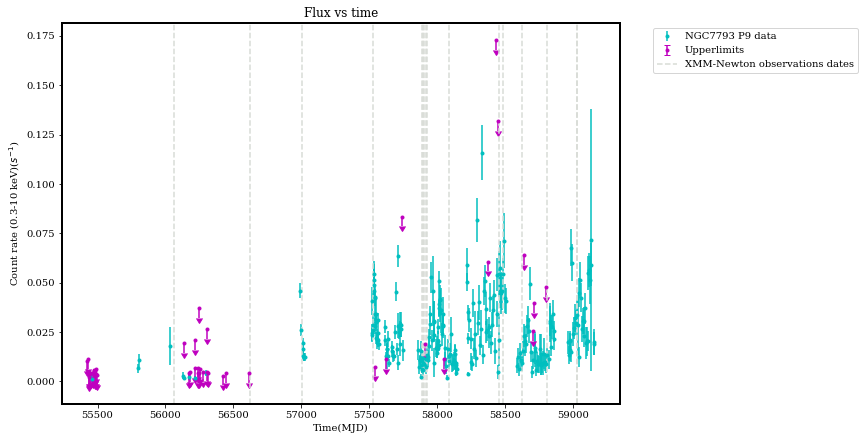

In [81]:
#ax1 = df.plot.scatter(x='time', y='source count-rate', c='aquamarine') #this option only suits to represent points alone
plt.figure(figsize=(10,7))
datos=plt.errorbar(df['time'],df['source count-rate'], yerr=df['source error(+)'], fmt='.c')
limites=plt.errorbar(upperlimits['time'],upperlimits['source count-rate'], fmt='.m',yerr=0.005,uplims=True)
for i in xmm['OBSERVATION.START_UTC']:
    xmm_start1=plt.axvline(x=i,color='xkcd:light grey',ls='--')
pylab.legend((datos,limites,xmm_start1),['NGC7793 P9 data','Upperlimits','XMM-Newton observations dates'],loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title("Flux vs time") 
plt.ylabel("Count rate (0.3-10 keV)($s^{-1}$)")                       
plt.xlabel("Time(MJD)") 
plt.savefig('lightcurve.png', bbox_inches='tight')

Now we are going to plot the same figure but, rescaling the x-axis to see better the 'dense' curve starting in 57500

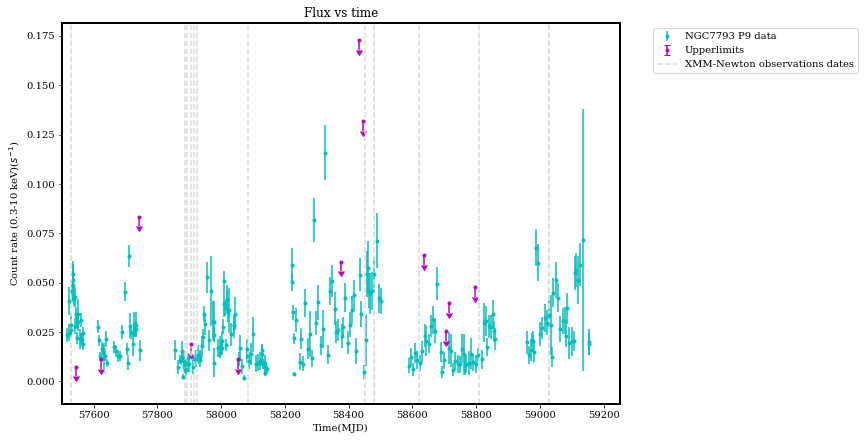

In [82]:
plt.figure(figsize=(10,7))
datos=plt.errorbar(df['time'],df['source count-rate'], yerr=df['source error(+)'], fmt='.c')
limites=plt.errorbar(upperlimits['time'],upperlimits['source count-rate'], fmt='.m',yerr=0.005,uplims=True)
for i in xmm['OBSERVATION.START_UTC']:
    xmm_start1=plt.axvline(x=i,color='xkcd:light grey',ls='--')
pylab.legend((datos,limites,xmm_start1),['NGC7793 P9 data','Upperlimits','XMM-Newton observations dates'],loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title("Flux vs time") 
plt.ylabel("Count rate (0.3-10 keV)($s^{-1}$)")                       
plt.xlabel("Time(MJD)") 
plt.xlim(57500,59250)
plt.savefig('lightcurve_zoom.png', bbox_inches='tight')

As we can see, we only have XMM observations during a 'high' state. All the others are kind of during a low part of the lightcurve. However, both states are relevant to the analysis.